In [ ]:
from numpy import loadtxt
from keras.models import Sequential
import pandas as pd
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras.layers import Dense , Activation, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data-2.csv', delimiter=',')
X = data.iloc[:,0:16].values
y = data.iloc[:,16].values
X.shape

(13611, 16)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)

In [ ]:
num_labels=len(np.unique(y_train))
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
from keras import regularizers
model=Sequential()
model.add(Dense(150,input_dim=16,activation='relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2550      
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 357       
                                                                 
Total params: 10,457
Trainable params: 10,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train= mms.fit_transform(X_train)
X_test= mms.transform(X_test)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=200)

Epoch 1/200
273/273 [==============================] - 2s 4ms/step - loss: 0.8666 - accuracy: 0.7240 - val_loss: 0.3755 - val_accuracy: 0.8848
Epoch 2/200
273/273 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8879 - val_loss: 0.3195 - val_accuracy: 0.8893
Epoch 3/200
273/273 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.8954 - val_loss: 0.2975 - val_accuracy: 0.8953
Epoch 4/200
273/273 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.9018 - val_loss: 0.2918 - val_accuracy: 0.8893
Epoch 5/200
273/273 [==============================] - 1s 3ms/step - loss: 0.2591 - accuracy: 0.9028 - val_loss: 0.2748 - val_accuracy: 0.9027
Epoch 6/200
273/273 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.9079 - val_loss: 0.2732 - val_accuracy: 0.8958
Epoch 7/200
273/273 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9106 - val_loss: 0.2716 - val_accuracy: 0.9054

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


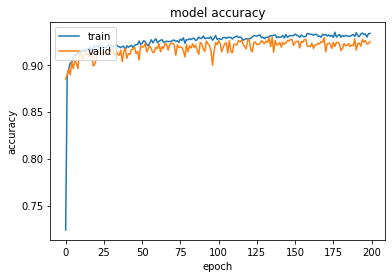

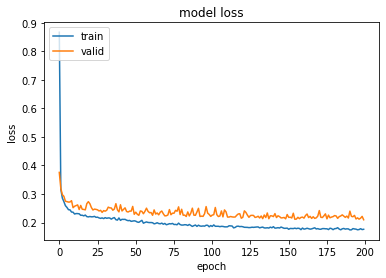

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#model değerlendirme
scores = model.evaluate(X_train,y_train,batch_size=1)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test,batch_size=1)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

10888/10888 [==============================] - 24s 2ms/step - loss: 0.1745 - accuracy: 0.9324
Training Accuracy: 93.24%

2723/2723 [==============================] - 6s 2ms/step - loss: 0.1950 - accuracy: 0.9306
Testing Accuracy: 93.06%



In [ ]:
pred=model.predict(X_test,batch_size=1,verbose=1)

2723/2723 [==============================] - 4s 1ms/step


In [ ]:
print(np.argmax(pred[0]))
y_test[0]

2


array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

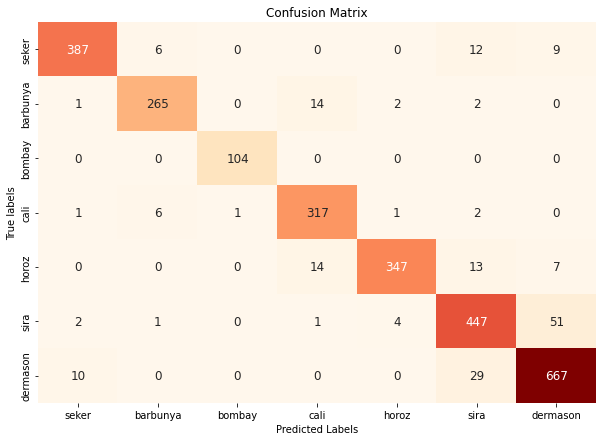

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

y_pred = [np.argmax(i) for i in pred]
y_pred=tf.keras.utils.to_categorical(y_pred)

import seaborn as sns

lables = ['seker','barbunya','bombay','cali','horoz',"sira","dermason"]    

fig, ax = plt.subplots(figsize=(10, 7))

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g',cmap='OrRd',cbar=False,annot_kws={"size": 12}, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables,); ax.yaxis.set_ticklabels(lables)
plt.show()

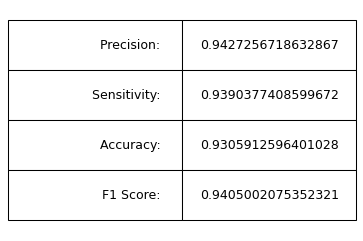

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import sensitivity_score 
import matplotlib.pyplot as plt 
from imblearn.metrics import specificity_score
fig = plt.figure(dpi=75)
ax = fig.add_subplot(1,1,1)
table=[
    ["Precision: ", precision_score(y_test, y_pred,average='macro')],
    ["Sensitivity: ", recall_score(y_test, y_pred ,average='macro')],
    ["Accuracy: ", accuracy_score(y_test, y_pred)],
    ["F1 Score: ", f1_score(y_test, y_pred,average='macro')],
]
table = ax.table(cellText=table, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.show()

In [ ]:
from keras.layers import Dense
import keras  
from keras.models import Sequential

def build_model(optimizer):
  model=Sequential()
  model.add(Dense(150,input_dim=16,activation='relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(7,activation='softmax'))
  model.summary() 
  model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  return model

In [ ]:
optimizers = {
        'Adam': 'optim.Adam(model.parameters())',
        'SGD': 'optim.SGD(model.parameters(), lr=0.01, momentum=0.9)',
        'Adadelta': 'optim.Adadelta(model.parameters())',
        'Adagrad': 'optim.Adagrad(model.parameters())',
        'Adamax': 'optim.Adamax(model.parameters())',
        'Nadam': 'optim.Nadam(model.parameters())',
        'Ftrl': 'optim.Ftrl(model.parameters())',
        'Rmsprop': 'optim.Rmsprop(model.parameters())',
    }
val_accuracy=[]
val_loss=[]
for i in optimizers:
  model = build_model(i)
  history=model.fit(X_train,y_train,validation_split=0.2,verbose=0,epochs=50)
  val_accuracy.append(history.history['val_accuracy'])
  val_loss.append(history.history['val_loss'])
  print('Optimizer: '+i)   

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 150)               2550      
                                                                 
 dense_43 (Dense)            (None, 50)                7550      
                                                                 
 activation_14 (Activation)  (None, 50)                0         
                                                                 
 dense_44 (Dense)            (None, 7)                 357       
                                                                 
Total params: 10,457
Trainable params: 10,457
Non-trainable params: 0
_________________________________________________________________
Optimizer: Adam
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 

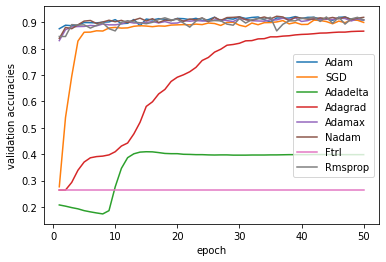

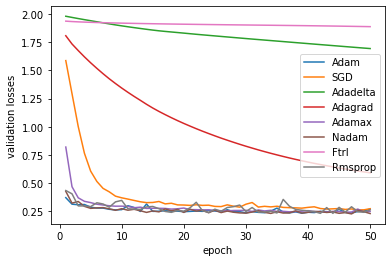

In [ ]:
import pickle
import random
from matplotlib import pyplot as plt
import numpy as np 

optimizers_ = list(optimizers.keys())
val_accuracy = dict(zip(optimizers_, val_accuracy))
val_loss = dict(zip(optimizers_, val_loss))

with open('val_accuracies', 'wb') as f:
    pickle.dump(val_accuracy, f)
with open('val_losses', 'wb') as f:
    pickle.dump(val_loss, f)

x = np.arange(50) + 1

for optimizers_ in optimizers_:
    plt.plot(x, val_accuracy[optimizers_], label=optimizers_)

plt.ylabel('validation accuracies')
plt.xlabel('epoch')
plt.legend()
plt.show()

for optimizers_ in optimizers:
    plt.plot(x, val_loss[optimizers_], label=optimizers_)

plt.ylabel('validation losses')
plt.xlabel('epoch')
plt.legend()
plt.show()